In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [2]:
def plot_pairs(pairs, data):
    for i, row in pairs.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        mult.plot_residue3(data, y_symbol, x_symbol, period)

In [16]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [17]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-07-15
data: (300, 74)
pairs: (2117, 12)


In [18]:
pairs

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,100,ABEV3,AZUL4,-4.232131,99,0.134246,2,0.688518,0.183142,Long/Short,1,100
1,100,ABEV3,B3SA3,-5.152845,99,0.206374,2,0.647070,0.875774,Long/Short,1,100
2,240,ABEV3,BBAS3,-3.226995,95,0.224840,9,0.595500,0.792877,Short/Long,4,"100,160,220,240"
3,240,ABEV3,BBDC3,-2.992381,95,0.339455,10,0.603754,0.799552,Short/Long,7,"100,120,140,160,180,220,240"
4,250,ABEV3,BBDC4,-2.872789,90,0.354872,10,0.551846,0.549149,Short/Long,9,"100,120,140,160,180,200,220,240,250"
...,...,...,...,...,...,...,...,...,...,...,...,...
2112,220,VIVT4,WEGE3,-3.242435,95,0.483872,9,0.348183,0.664601,Long/Short,7,"100,120,140,160,180,200,220"
2113,250,VIVT4,YDUQ3,-4.621934,99,0.344524,4,0.332435,0.373889,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2114,250,VVAR3,WEGE3,-2.983978,95,0.569959,12,0.564770,0.513990,Short/Long,3,"220,240,250"
2115,250,VVAR3,YDUQ3,-3.005048,95,0.266065,15,0.552114,1.501431,Short/Long,9,"100,120,140,160,180,200,220,240,250"


In [19]:
pairs_signal = pairs.loc[
    (pairs['Signal'] >= 1) \
    & (pairs['Signal'] <= 1.2) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,TAEE11,USIM5,-4.952494,99,0.852332,4,0.474926,1.038468,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,BBAS3,YDUQ3,-4.349193,99,0.654696,5,0.600867,1.127093,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,BBDC4,YDUQ3,-4.590174,99,0.399168,5,0.515116,1.103004,Short/Long,9,"100,120,140,160,180,200,220,240,250"
3,250,BRAP4,BRKM5,-4.315790,99,0.742510,5,0.549617,1.036875,Short/Long,9,"100,120,140,160,180,200,220,240,250"
4,250,CSAN3,MULT3,-4.562202,99,1.978095,5,0.698561,1.029979,Short/Long,9,"100,120,140,160,180,200,220,240,250"
5,250,RENT3,TAEE11,-4.379721,99,4.027392,5,0.581797,1.181197,Short/Long,9,"100,120,140,160,180,200,220,240,250"
6,250,ABEV3,CCRO3,-4.090336,99,0.701059,6,0.558767,1.133785,Short/Long,9,"100,120,140,160,180,200,220,240,250"
7,250,BBAS3,COGN3,-4.302097,99,2.954767,6,0.668658,1.101413,Long/Short,9,"100,120,140,160,180,200,220,240,250"
8,250,BRAP4,GOAU4,-3.674058,99,2.117466,6,0.747240,1.162121,Short/Long,9,"100,120,140,160,180,200,220,240,250"
9,250,CMIG4,ENGI11,-4.238923,99,0.298676,6,0.765500,1.151398,Short/Long,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

In [21]:
#plot_pairs(pairs_signal, data)

In [8]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [9]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [22]:
oper = pd.read_csv('datasets/oper/13072020.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CMIG4,ENGI11,-4.257065,99,0.298534,5,0.768918,1.023665,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,250,BRKM5,LAME4,-4.066723,99,1.197584,6,0.554915,1.082008,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2,250,ELET3,PCAR3,-4.496931,99,0.477546,6,0.314905,1.105713,Short/Long,9,"100,120,140,160,180,200,220,240,250"


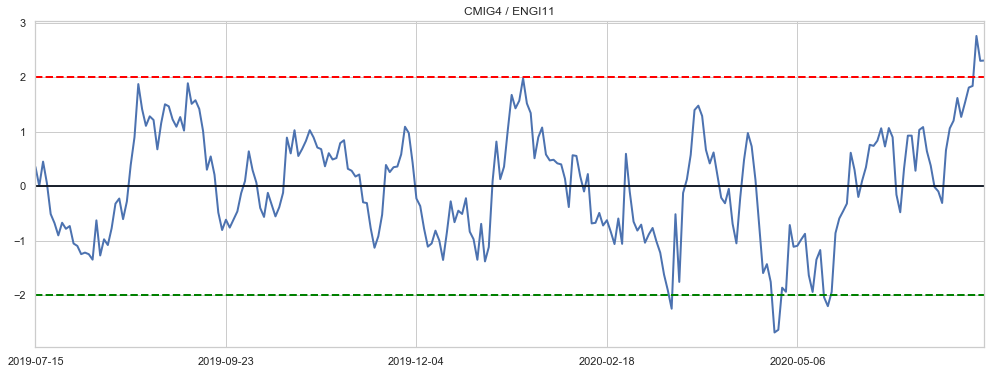

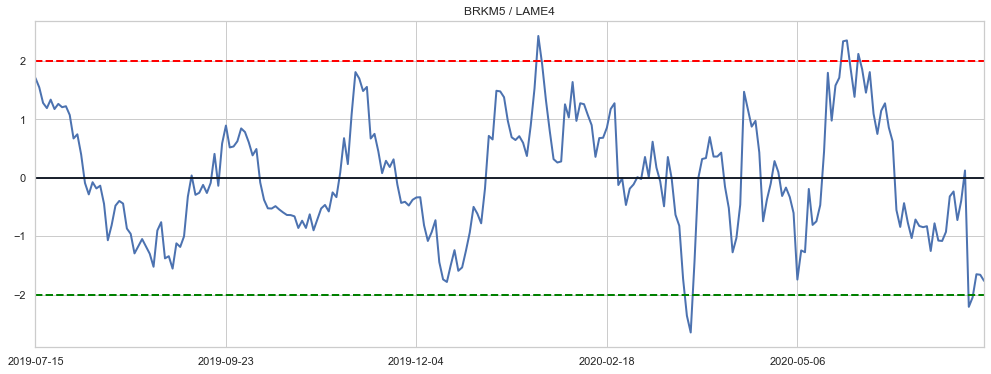

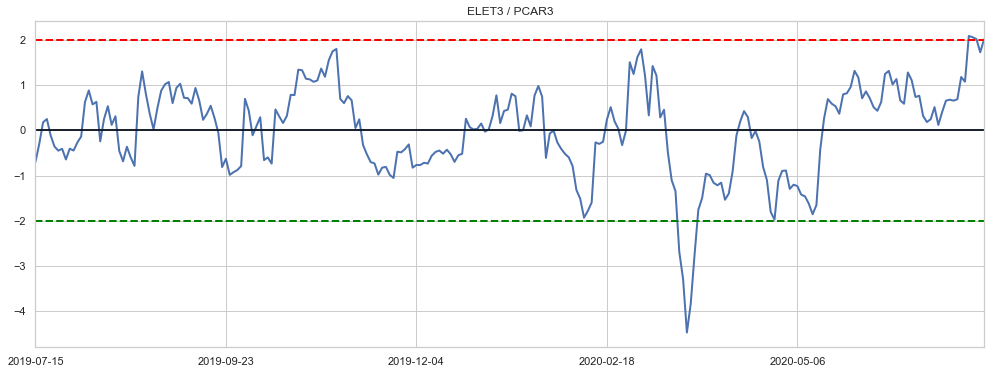

In [23]:
plot_pairs(oper, data)

In [15]:
mult.summary(data, 'CMIG4', 'ENGI11', 250)
mult.summary(data, 'BRKM5', 'LAME4', 250)
mult.summary(data, 'ELET3', 'PCAR3', 250)

Período de Análise                   250   Entrada      Venda:CMIG4 / Compra:ENGI11
Independente                       CMIG4   Dependente                        ENGI11
R$                                 11.45   R$                                 46.58
Ratio                 0.2458136401710373   
→ CASH NEUTRAL ←
CMIG4                          -406.8122   Financeiro R$                 -4657.9997
ENGI11                               100   Financeiro R$                     4658.0
                                                                             0.0003
→ BETA NEUTRAL ←
ENGI11                                29   Financeiro R$                    1350.82
CMIG4                               -100   Financeiro R$                    -1145.0
                                                                             205.82
Somente para operação Beta Neutral:
Retorno  (%)          11.755297084578098   Gain                  154.97602358673865
Atual    (%)          13.535024119505646   Los